In [34]:
from electrical_data_process import *

In [35]:
m_sep = Measurments('sep_samples')
p_sep = Process_DC_IV(m_sep.get_abspath())
d_sep = Draw_DC_IV(m_sep.get_abspath())

In [36]:
sep_dict = m_sep.get_contact_dict('14G-150')
ifs_14G_150 = [4,6,8,9,10,13,15,17,21,22,24,26,27,29]
for i in range(len(list(sep_dict.values())[0])+1):
    if i not in ifs_14G_150:
        m_sep.delete_measurments({'14G-150': [i]})
sep_dict = m_sep.get_contact_dict('14G-150')

In [37]:
m_hbn = Measurments('hBN_1')
p_hbn = Process_DC_IV(m_hbn.get_abspath())
d_hbn = Draw_DC_IV(m_hbn.get_abspath())
m_hbn.delete_measurments({16: [i for i in range(52)] + [i for i in range(101,107)] + [154,155]})
dict_16 = m_hbn.get_contact_dict(16)

In [38]:
m_ts = Measurments('sample_3.1')
p_ts = Process_DC_IV(m_ts.get_abspath())
d_ts = Draw_DC_IV(m_ts.get_abspath())
m_ts.delete_measurments({'C20-25': [1,2,3,4,5,6,7] + [i for i in range(37,53)]})
C20_25_dict = m_ts.get_contact_dict('C20-25')

In [39]:
m_ts.delete_measurments({'C20-100': [3,5,6,10,11,12,13,14,18,20,21,22,23,24,27] + [i for i in range(29,43)]})
C20_100_dict = m_ts.get_contact_dict('C20-100')

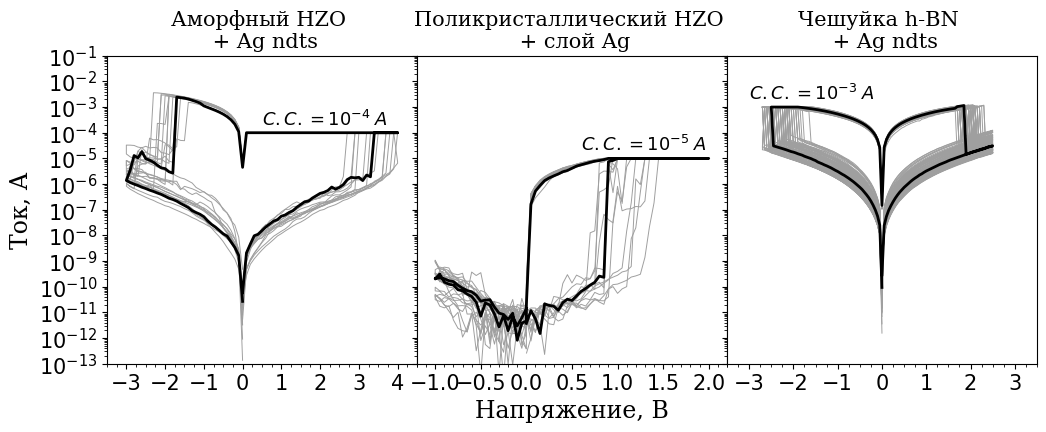

In [68]:
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(ncols=3, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])
ax_3 = fig.add_subplot(gs[2])

y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)

d_sep.multiple(sep_dict, ax_1, linewidth = 0.7, color = '#9f9f9f')
ax_1.set(yscale='log', ylim=(10 ** (-13), 10 ** (-1)), xlim=(-3.5, 4.5))
d_sep.add_single_line(ax_1, '14G-150', 21, color = 'k', linewidth = 2)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax_1.yaxis.set_major_locator(y_major)
ax_1.yaxis.set_minor_locator(y_minor)
ax_1.tick_params(labelsize=15)
ax_1.set_ylabel(ylabel = 'Ток, А', size = 17, fontfamily =  'serif')
ax_1.set_title('Аморфный HZO \n + Ag ndts', fontfamily =  'serif', size = 15)
ax_1.text(0.5, 2 * 10 ** (-4), r'$C.C. = 10^{-4}\; A$', size = 13)

d_ts.multiple(C20_100_dict, ax_2, linewidth = 0.7, color = '#9f9f9f')
ax_2.set(yscale='log', ylim=(10 ** (-13), 10 ** (-1)), xlim=(-1.2, 2.2))
d_ts.add_single_line(ax_2, 'C20-100', 2, color = 'k', linewidth = 2)
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_2.yaxis.set_major_locator(y_major)
ax_2.yaxis.set_minor_locator(y_minor)
ax_2.set_xlabel(xlabel='Напряжение, В', size = 17, fontfamily =  'serif')
ax_2.tick_params(labelsize=15, labelleft = False)
ax_2.set_title('Поликристаллический HZO \n + слой Ag', fontfamily =  'serif', size = 15)
ax_2.text(0.6, 2 * 10 ** (-5), r'$C.C. = 10^{-5} \; A$', size = 13)

d_hbn.multiple(dict_16, ax_3, linewidth = 0.7, color = '#9f9f9f')
ax_3.set(yscale='log', ylim=(10 ** (-13), 10 ** (-1)), xlim=(-3.5, 3.5))
d_hbn.add_single_line(ax_3, '16', 100, color = 'k', linewidth = 2)
ax_3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax_3.yaxis.set_major_locator(y_major)
ax_3.yaxis.set_minor_locator(y_minor)
ax_3.tick_params(labelsize=15, labelleft = False)
ax_3.set_title('Чешуйка h-BN \n + Ag ndts', fontfamily =  'serif', size = 15)
ax_3.text(-3, 2 * 10 ** (-3), r'$C.C. = 10^{-3} \; A$', size = 13)

gs.update(wspace=0)

#plt.savefig('conf_info.png', dpi = 300, bbox_inches = 'tight')